In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import Formatter    # to convert xaxis label to dates
from datetime import datetime, timedelta
import pytz
import pandas as pd
import datetime
from datetime import date
import time
import numpy as np


from lz_ignition_dbi.lz_ignition_dbi import IDBIWrapper
import lz_ignition_dbi.lz_ignition_bindata as bindata

#starting from here:
#https://gitlab.com/luxzeplin/sharing/slowcontrolanalysis/-/blob/main/DetectorStatusChecks.ipynb

/cvmfs/lz.opensciencegrid.org/external/Python/3.8.9_CI/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
tags_c  = ['5505OHM', '5502DO', 'RAD73', 'DAVISP', '6405FM', '6401FM', '6233PT', '6232PT', '6231PT', '6405RG',
        'S1ODROW1', 'S1ODROW2', 'S1ODROW3', 'S1ODROW4', 'S1ODROW5', 'S1ODROW6', ]
label = ['[MOhm/cm]', '[ppb]', '[counts]', 'mbar', 'flow', 'flow', '[mbar]',  '[mbar]', '[mbar]', 'setpoint', 
         '[Hz]', '[Hz]', '[Hz]', '[Hz]', '[Hz]', '[Hz]']
color = ['b', 'r', 'darkorange', 'peru', 'salmon', 'powderblue', 'cadetblue', 'lime', 'limegreen', 'seagreen', 'darkslategrey',
        'steelblue', 'lightslategrey', 'slateblue', 'darkslateblue',  'midnightblue',  'lightblue', 'maroon', 'lightcoral', 'peachpuff']

tags=tags_c
df=pd.DataFrame(list(zip(tags, label, color)),
              columns=['tags','label', 'color'])

tags_w  = ['DAVIST', 'WATERRT', '5506T', '5507T', 'OD1Temp', 'OD2Temp', 'OD3Temp']
label_w = ['[C]', '[C]', '[C]', '[C]', '[C]', '[C]', '[C]']

tags_f  = ['WTCORR', 'TATCORR', 'SATCORR', 'BATCORR', 'WTTOPDIFF', 'WTSIDEDIFF', 'WTBOTDIFF']
label_f = ['[cm]', '[cm]', '[cm]', '[cm]', '[cm]', '[cm]', '[cm]']



days_past=1


In [3]:
axis_type = 'dateLabel' 
#TIMEZONE='US/Mountain'
#DATEFORMAT='%Y-%-m-%-dT%H:%M' # see https://strftime.org/ 

TIMEZONE = 'US/Mountain'
DATEFORMAT = '%Y-%-m-%-dT%H:%M'  # see https://strftime.org/

class DateFormat(Formatter):
    """
    This class converts the seconds since unix epoch to date strings
    """
    def __init__(self, format=None, timezone=None):
        self.format = format if format is not None else '%Y-%m-%dT%H:%M'
        self.timezone = timezone if timezone is not None else 'US/Mountain'

    def __call__(self, x, pos=None):
        tz = pytz.timezone(TIMEZONE)
        newticklabel = datetime.datetime.fromtimestamp(x).astimezone(tz).strftime(self.format)
        return newticklabel

dateformatter = DateFormat(DATEFORMAT, TIMEZONE)


In [4]:
# Retrieve the slow control data from the Ignition DB, '2021-12-23T09:30:00' start of SR1

end = datetime.datetime.fromtimestamp(time.time()) # Get today's date
start = end - datetime.timedelta(days=days_past)           # Get date from a week ago
end = end.isoformat()                              # Convert to correct format
start = start.isoformat()

idbi = IDBIWrapper(known_tags_file='/global/u2/p/penning/work/od_ignition_mon/bp_tag_map_PMTs.json')
idbi.select(tags, start, end)
data = idbi.resolve(dateformat='unix')

# DBI returns times in units of ms. Convert to s for formatter
for t in tags:
    data[t]['times'] = [ x/1000. for x in data[t]['times'] ]    
 


5505OHM


<Figure size 432x288 with 0 Axes>

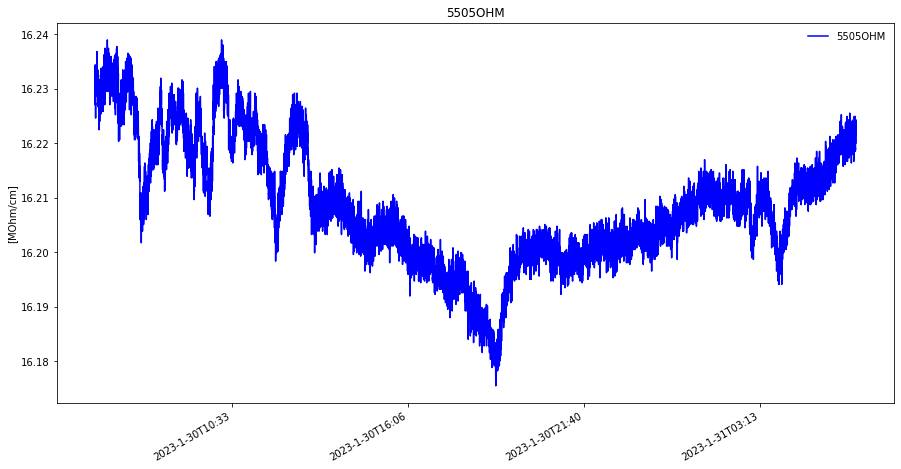

5502DO


<Figure size 432x288 with 0 Axes>

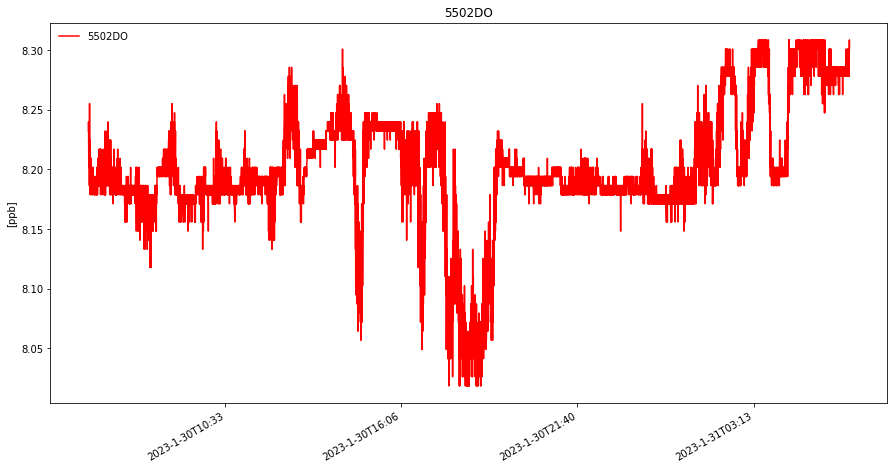

RAD73


<Figure size 432x288 with 0 Axes>

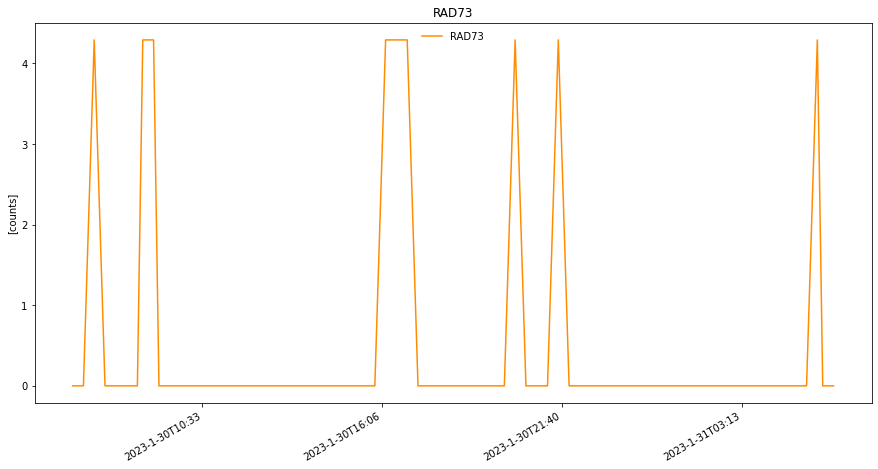

DAVISP


<Figure size 432x288 with 0 Axes>

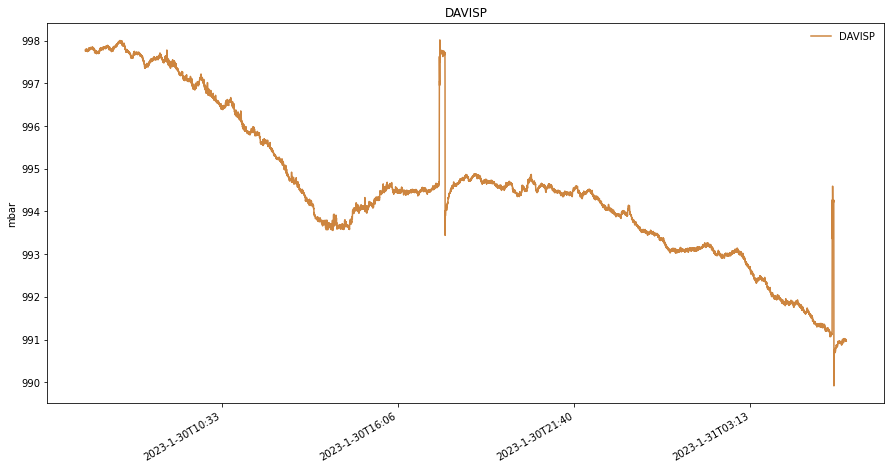

6405FM


<Figure size 432x288 with 0 Axes>

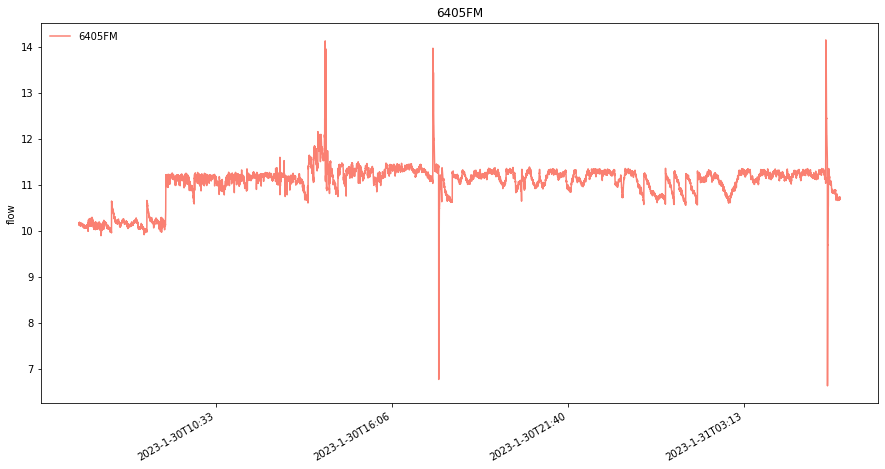

6401FM


<Figure size 432x288 with 0 Axes>

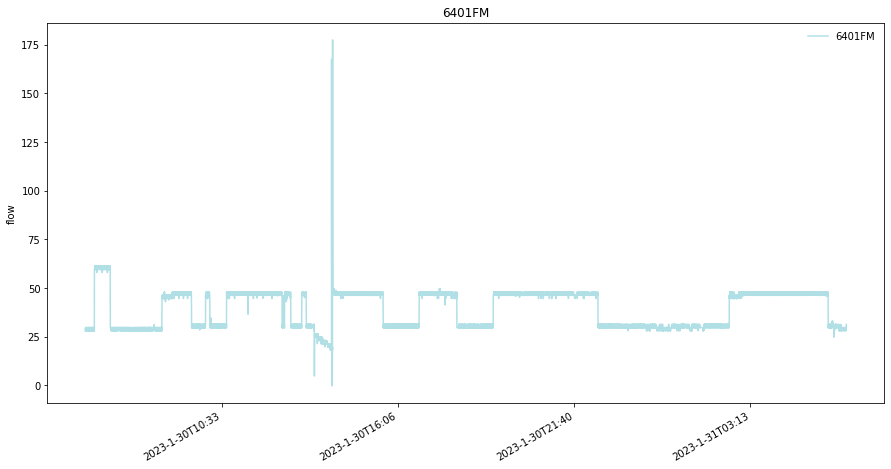

6233PT


<Figure size 432x288 with 0 Axes>

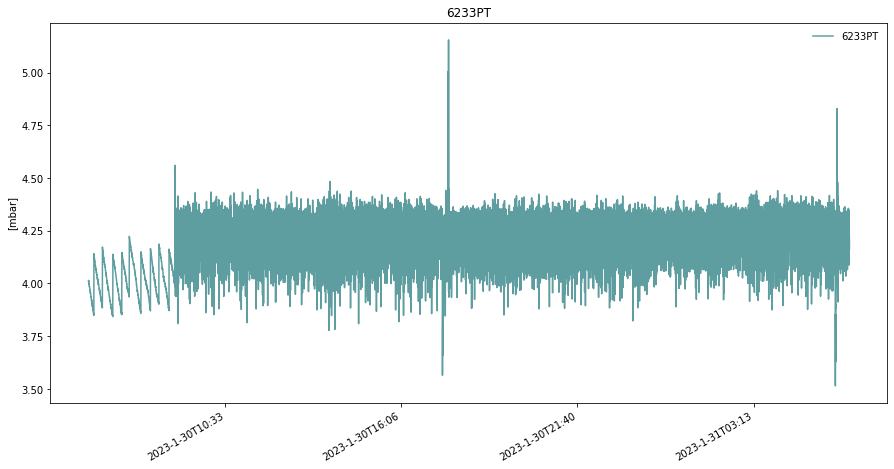

6232PT


<Figure size 432x288 with 0 Axes>

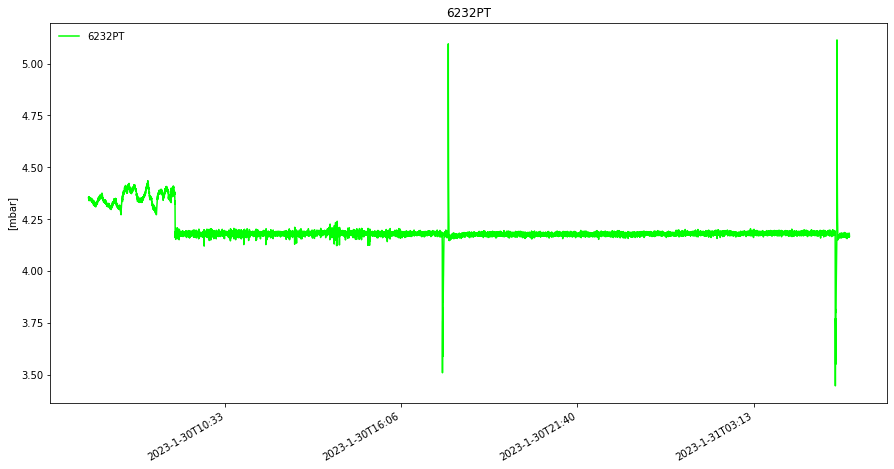

6231PT


<Figure size 432x288 with 0 Axes>

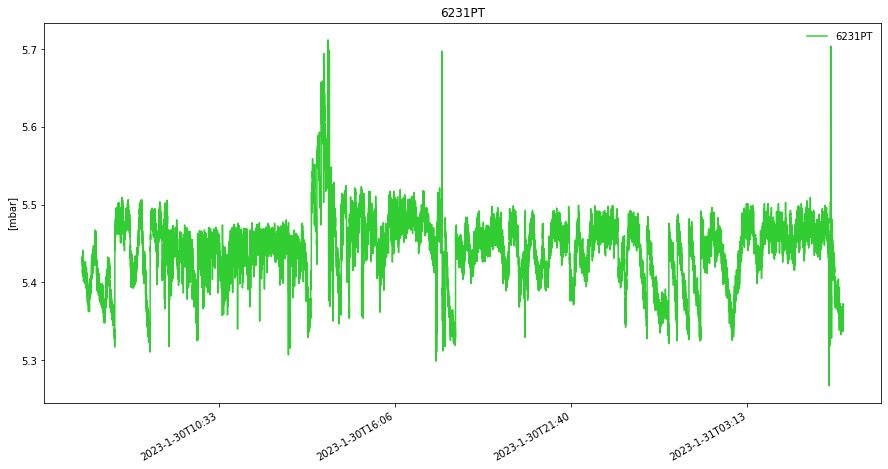

6405RG


<Figure size 432x288 with 0 Axes>

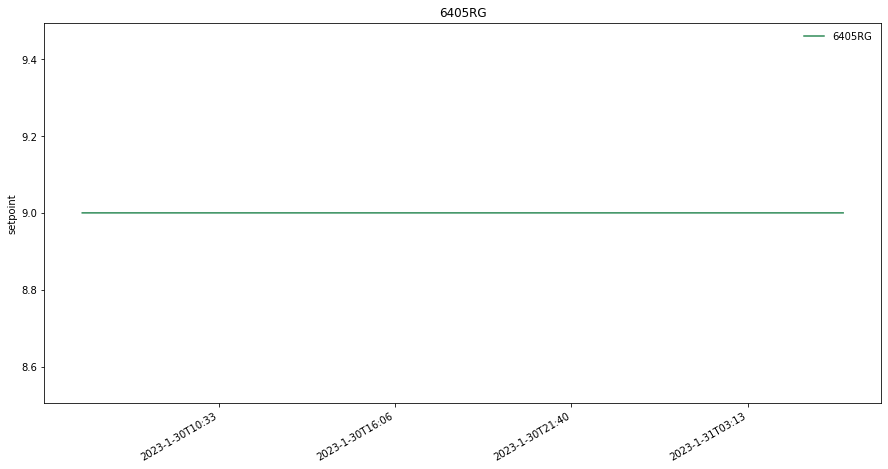

S1ODROW1


<Figure size 432x288 with 0 Axes>

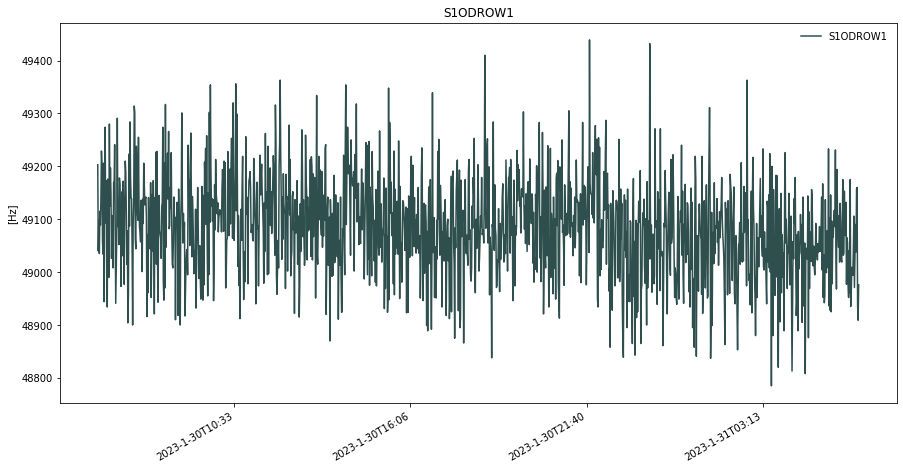

S1ODROW2


<Figure size 432x288 with 0 Axes>

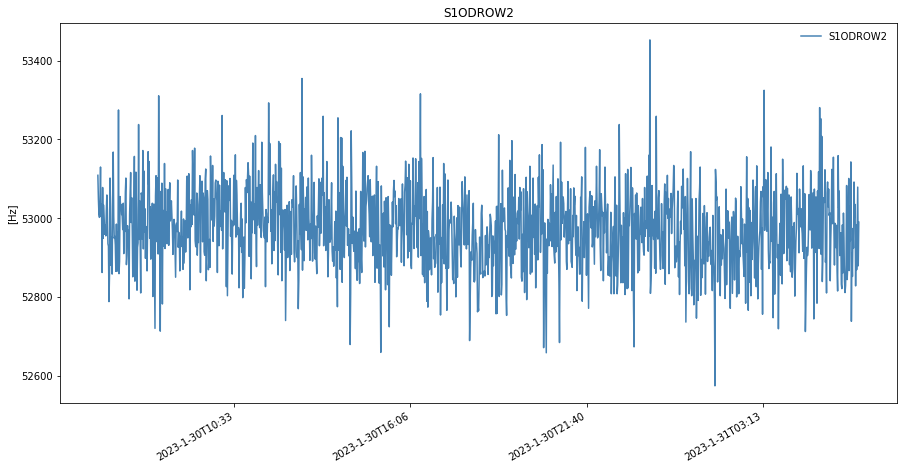

S1ODROW3


<Figure size 432x288 with 0 Axes>

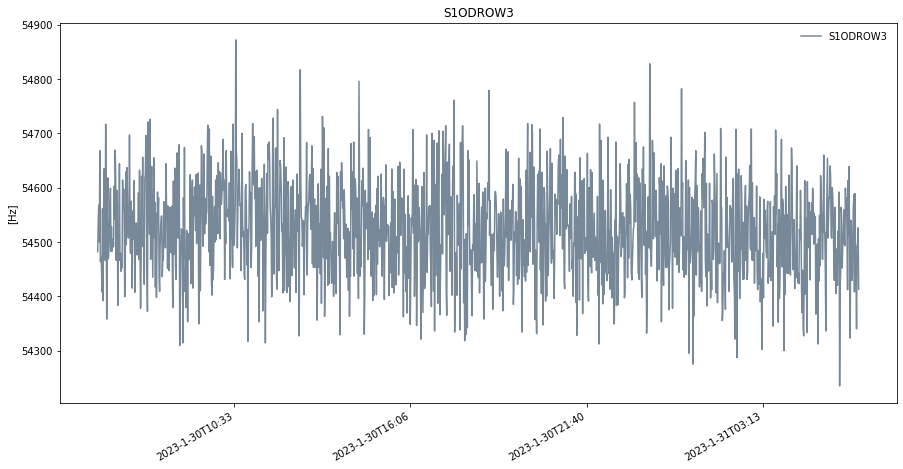

S1ODROW4


<Figure size 432x288 with 0 Axes>

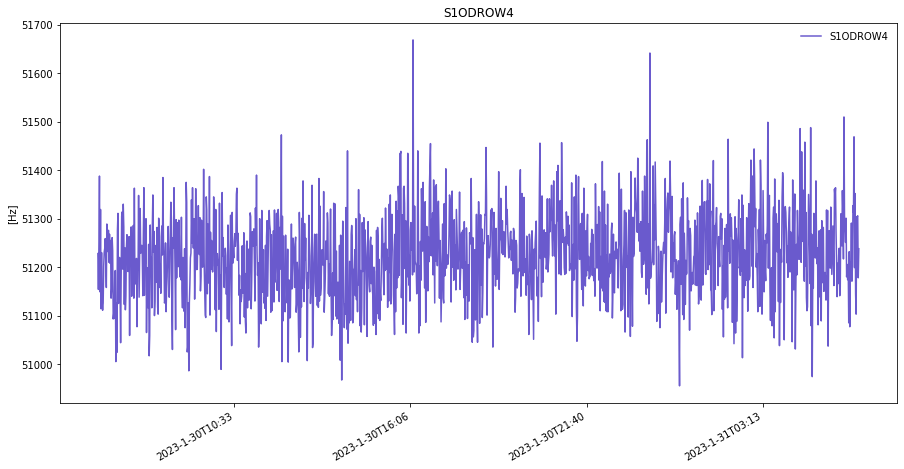

S1ODROW5


<Figure size 432x288 with 0 Axes>

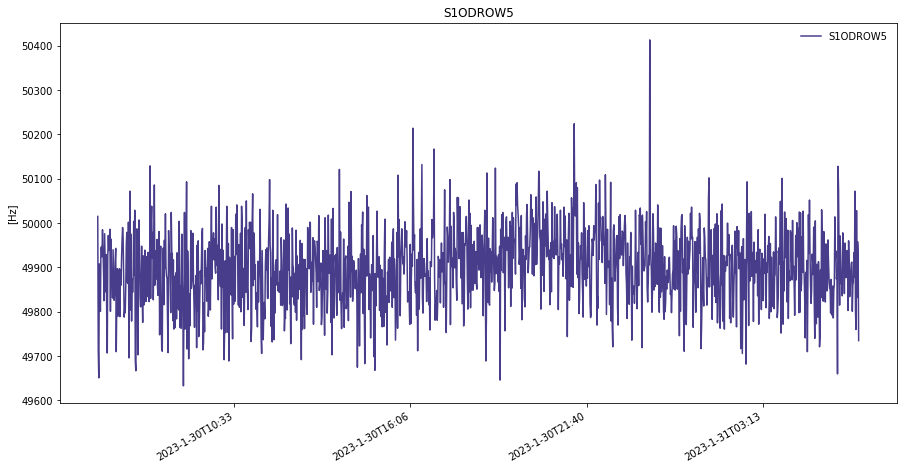

S1ODROW6


<Figure size 432x288 with 0 Axes>

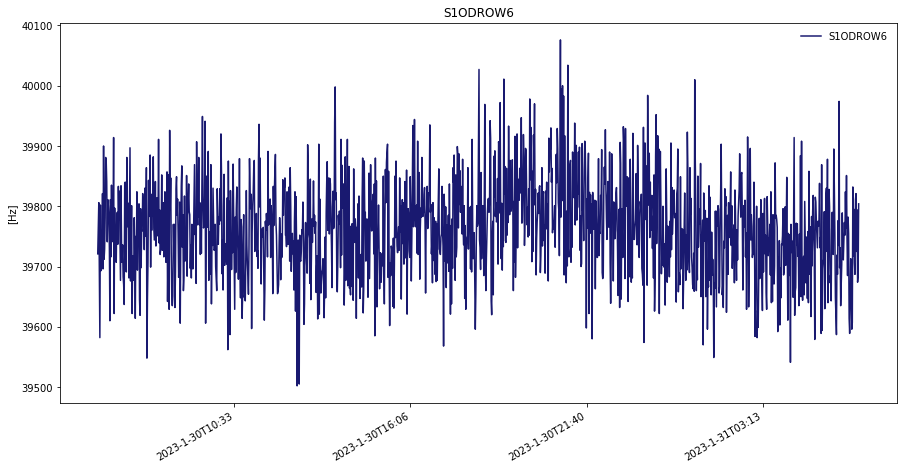

In [5]:
counter=0
for t in tags:
    print(t)
    fig = plt.figure()
    plt.figure(linewidth=1, figsize=(15, 7))
    ax = plt.gca()
    ax.plot(data[t]['times'], data[t]['vals'], color[counter], label=t)
    plt.title(t)
    plt.ylabel(label[counter])
    ax.legend(frameon=False)
    # Convert UNIX timestamps to human-readable
    ax.xaxis.set_major_formatter(dateformatter)
    for tick in ax.xaxis.get_majorticklabels():
            tick.set_horizontalalignment('right')
            tick.set_rotation(30)
    fig.subplots_adjust(bottom=0.2, left=0.15)
    plt.show()
    counter+=1



DAVIST


<Figure size 432x288 with 0 Axes>

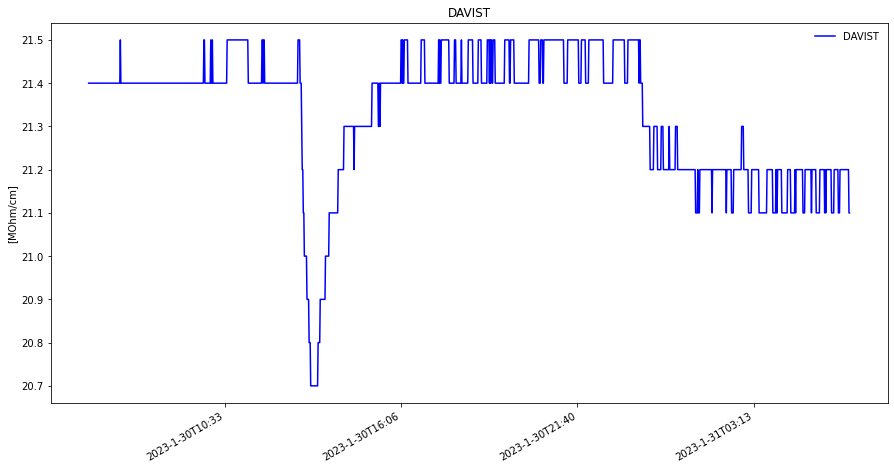

WATERRT


<Figure size 432x288 with 0 Axes>

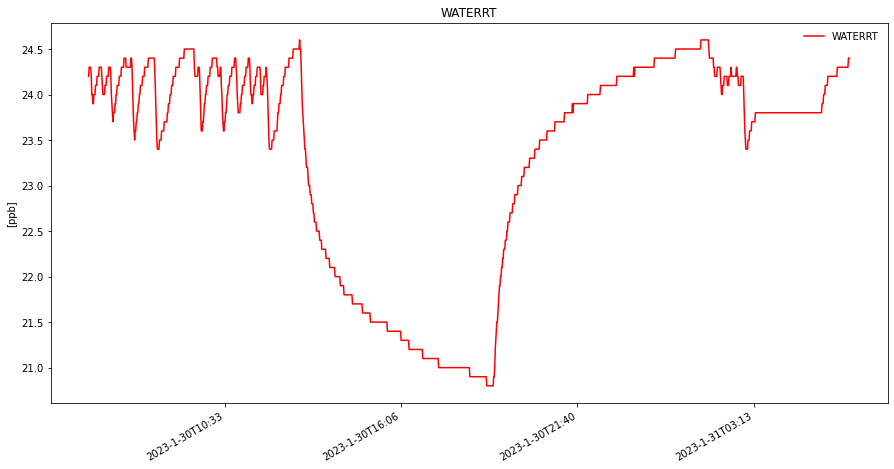

5506T


<Figure size 432x288 with 0 Axes>

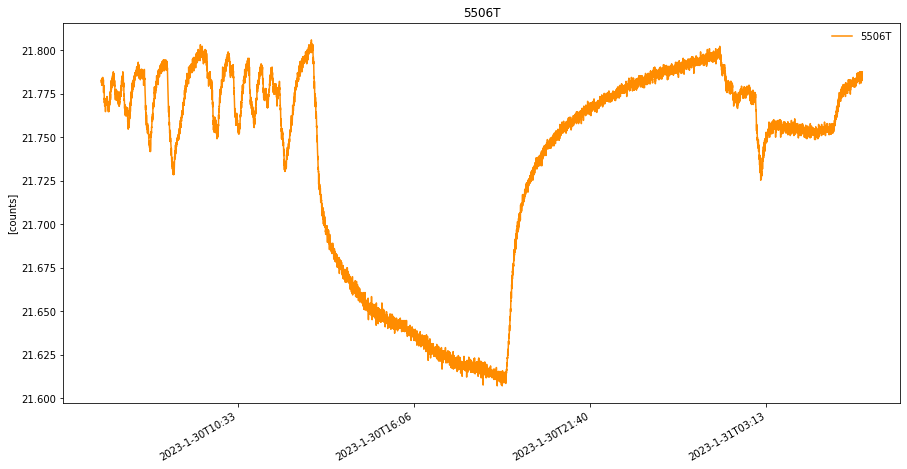

5507T


<Figure size 432x288 with 0 Axes>

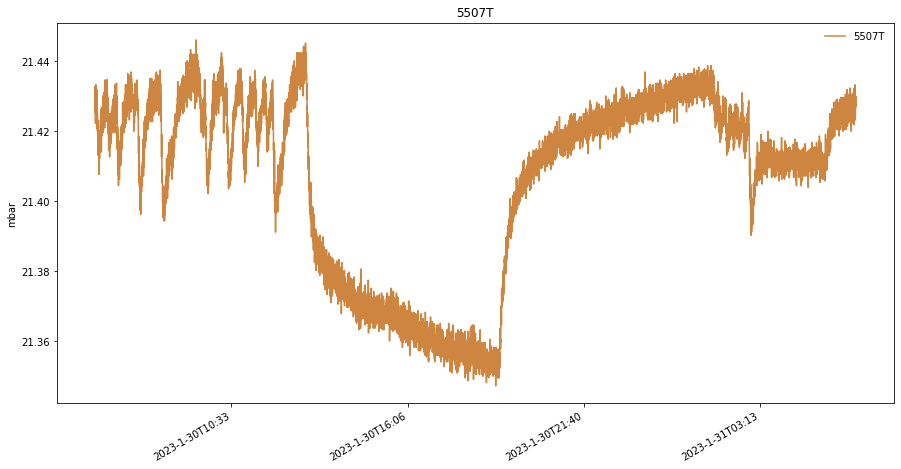

OD1Temp


<Figure size 432x288 with 0 Axes>

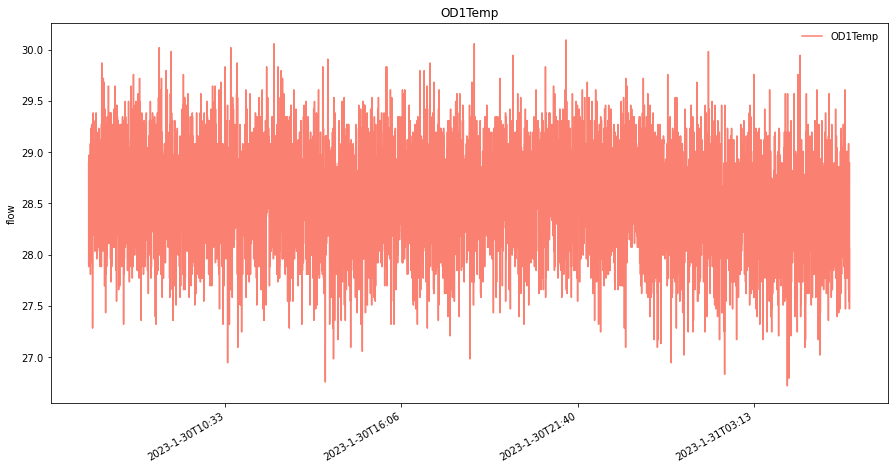

OD2Temp


<Figure size 432x288 with 0 Axes>

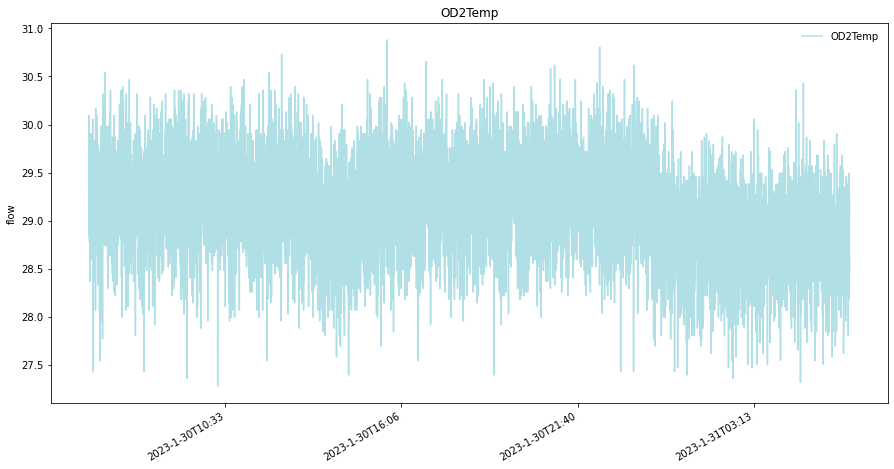

OD3Temp


<Figure size 432x288 with 0 Axes>

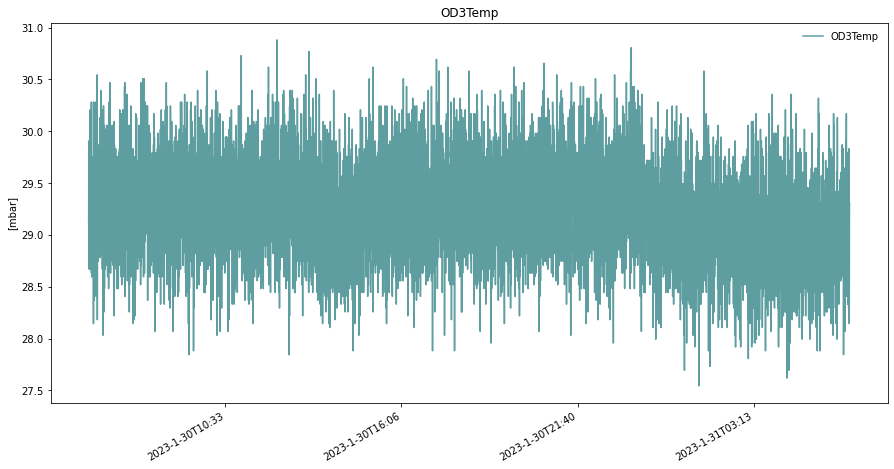

In [6]:
counter=0
tags=tags_w

df=pd.DataFrame(list(zip(tags, label, color)),
              columns=['tags_w','label_w', 'color'])

idbi.select(tags, start, end)
data = idbi.resolve(dateformat='unix')

# DBI returns times in units of ms. Convert to s for formatter
for t in tags:
    data[t]['times'] = [ x/1000. for x in data[t]['times'] ]    
for t in tags:
    print(t)
    fig = plt.figure()
    plt.figure(linewidth=1, figsize=(15, 7))
    ax = plt.gca()
    ax.plot(data[t]['times'], data[t]['vals'], color[counter], label=t)
    plt.title(t)
    plt.ylabel(label[counter])
    ax.legend(frameon=False)
    # Convert UNIX timestamps to human-readable
    ax.xaxis.set_major_formatter(dateformatter)
    for tick in ax.xaxis.get_majorticklabels():
            tick.set_horizontalalignment('right')
            tick.set_rotation(30)
    fig.subplots_adjust(bottom=0.2, left=0.15)
    plt.show()
    counter+=1


WTCORR


<Figure size 432x288 with 0 Axes>

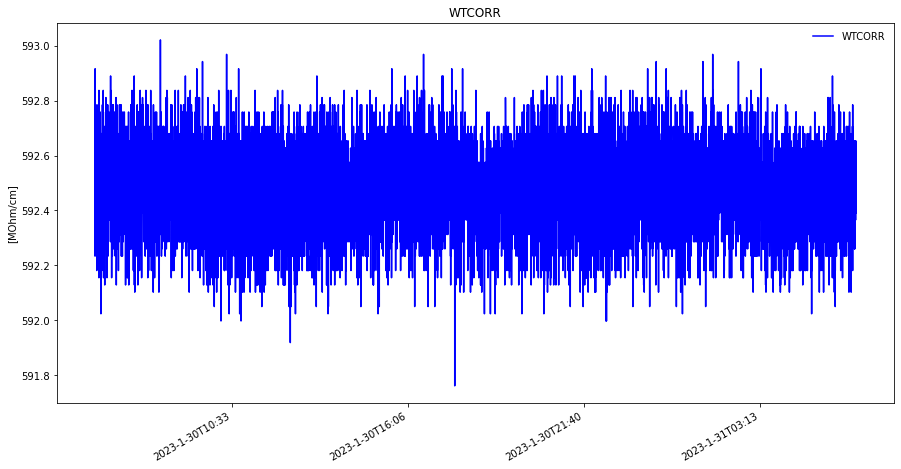

TATCORR


<Figure size 432x288 with 0 Axes>

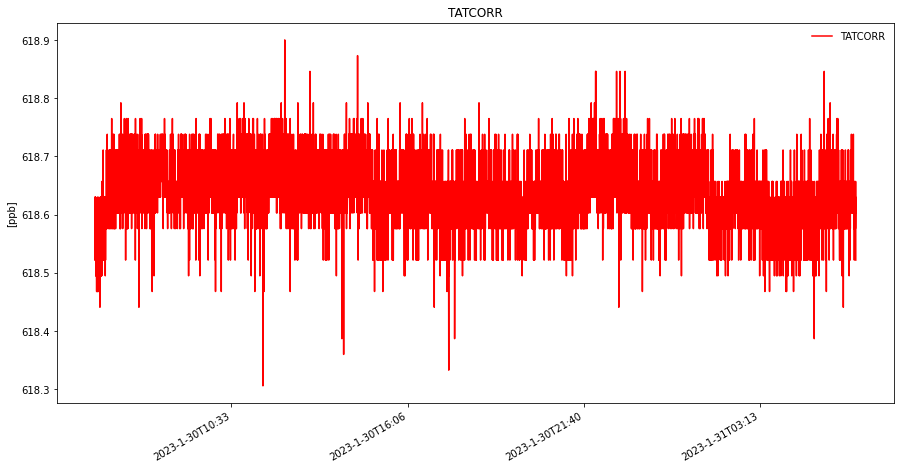

SATCORR


<Figure size 432x288 with 0 Axes>

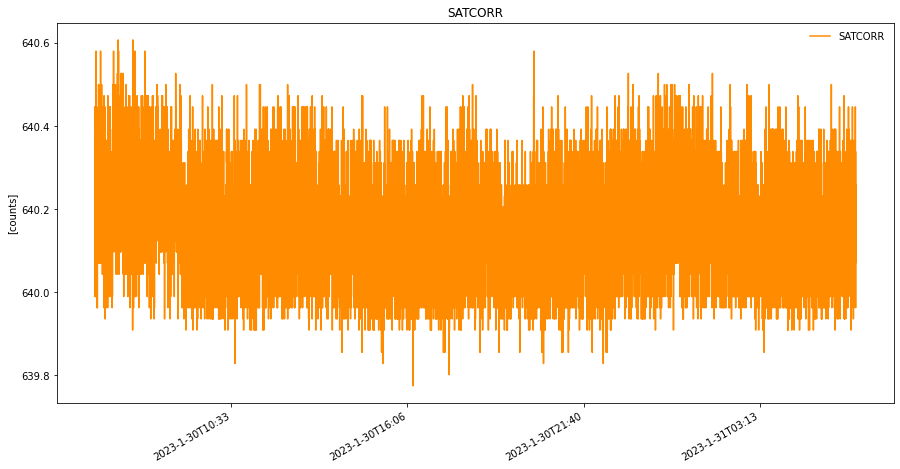

BATCORR


<Figure size 432x288 with 0 Axes>

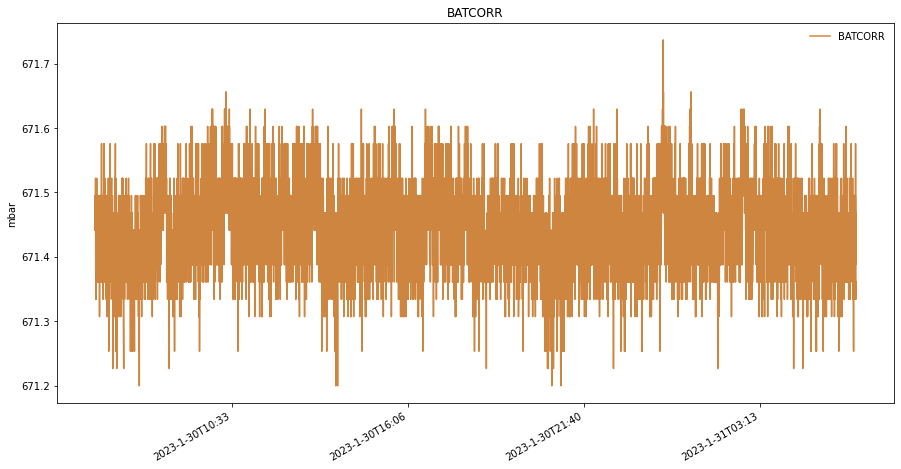

WTTOPDIFF


<Figure size 432x288 with 0 Axes>

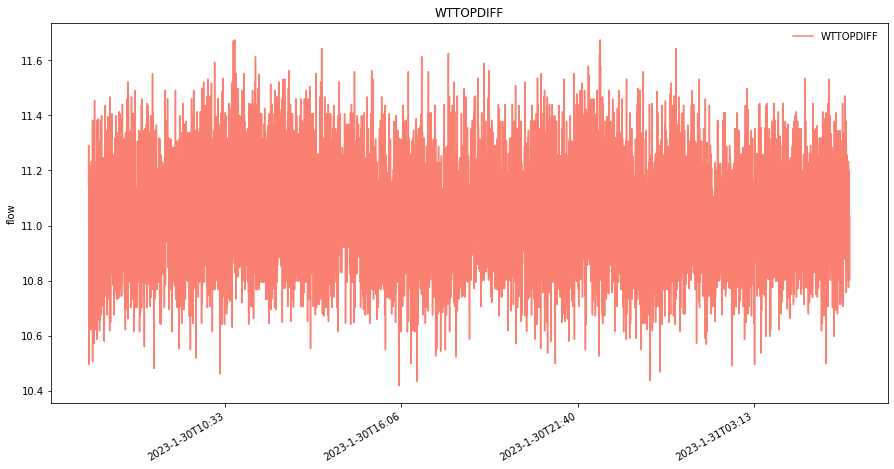

WTSIDEDIFF


<Figure size 432x288 with 0 Axes>

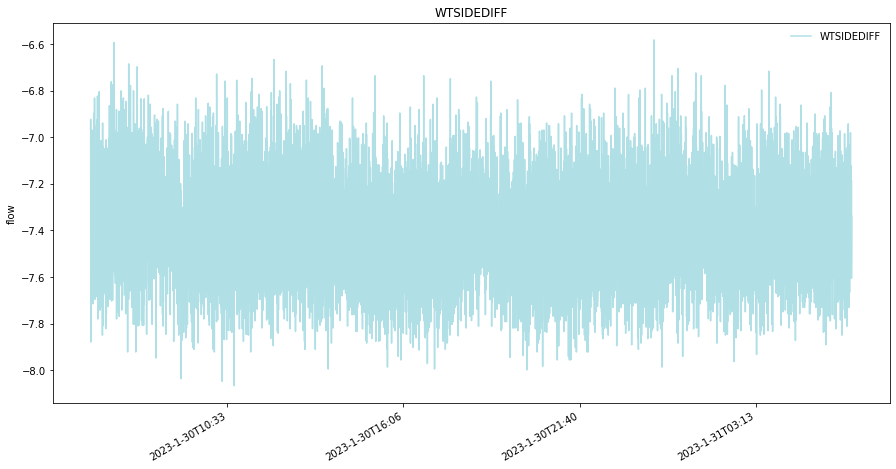

WTBOTDIFF


<Figure size 432x288 with 0 Axes>

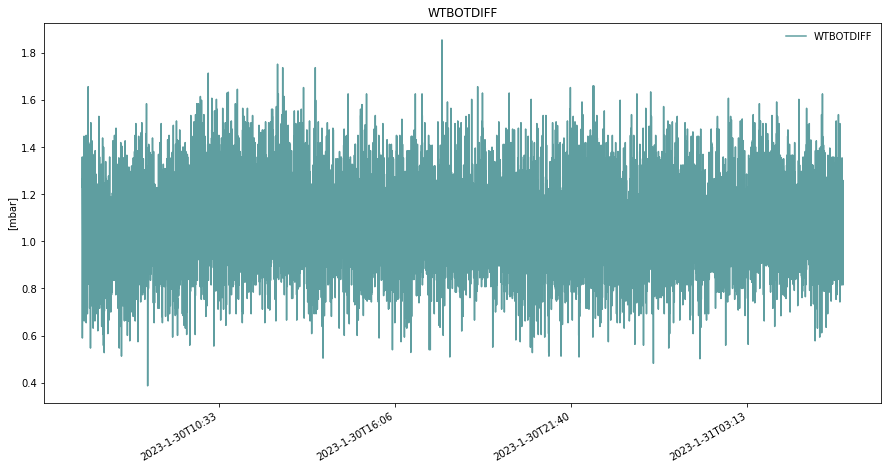

In [7]:
counter=0
tags=tags_f

df=pd.DataFrame(list(zip(tags, label, color)),
              columns=['tags_f','label_f', 'color'])

idbi.select(tags, start, end)
data = idbi.resolve(dateformat='unix')

# DBI returns times in units of ms. Convert to s for formatter
for t in tags:
    data[t]['times'] = [ x/1000. for x in data[t]['times'] ]    
for t in tags:
    print(t)
    fig = plt.figure()
    plt.figure(linewidth=1, figsize=(15, 7))
    ax = plt.gca()
    ax.plot(data[t]['times'], data[t]['vals'], color[counter], label=t)
    plt.title(t)
    plt.ylabel(label[counter])
    ax.legend(frameon=False)
    # Convert UNIX timestamps to human-readable
    ax.xaxis.set_major_formatter(dateformatter)
    for tick in ax.xaxis.get_majorticklabels():
            tick.set_horizontalalignment('right')
            tick.set_rotation(30)
    fig.subplots_adjust(bottom=0.2, left=0.15)
    plt.show()
    counter+=1
